In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('../content/dataset/dataset1.csv')
data

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [3]:
data.shape

(15, 2)

In [4]:

data.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


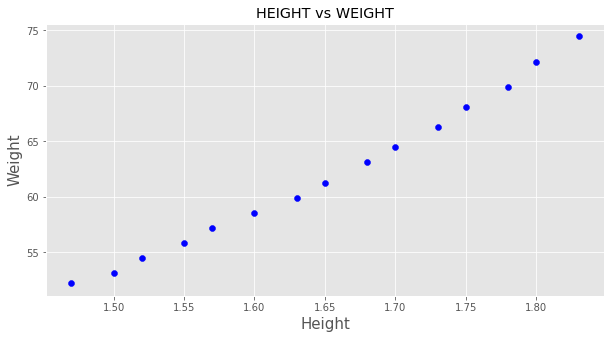

In [5]:
plt.figure(figsize=(10,5))
plt.title('HEIGHT vs WEIGHT')
plt.xlabel('Height', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.scatter(data.Height, data.Weight, color='blue')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (11, 1)
X_test: (4, 1)
y_train: (11,)
y_test: (4,)


In [9]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [10]:
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Coefficient: [61.65610384]
Intercept: -39.51671772684754


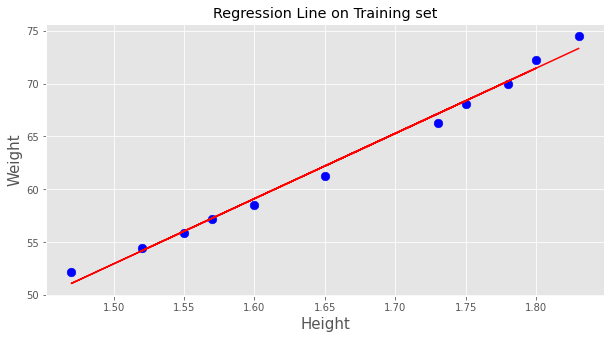

In [11]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Height', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, regr.predict(X_train), color='red')
plt.show()


In [12]:
y_pred = np.round(regr.predict(X_test), decimals=2)
pd.DataFrame({'Height': X_test[:,0], 'Actual Weight': y_test, 'Predicted Weight': y_pred})

,Height,Actual Weight,Predicted Weight
0,1.50,53.12,52.97
1,1.63,59.93,60.98
2,1.68,63.11,64.07
3,1.70,64.47,65.30


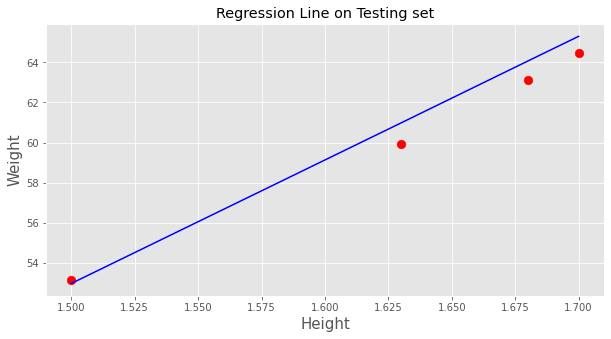

In [13]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Testing set')
plt.xlabel('Height', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.scatter(X_test, y_test,s=75, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.show()

In [14]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.747499999999997
Residual Sum of Squares(MSE): 0.6838749999999947
R2-Score: 0.9644246247142545
